In [1]:

import networkx as nx
from operator import add, sub

import numpy as np
import matplotlib.pyplot as plt
from def_space_spring import *
import random
import copy
import python.tools as tl
from statistics import mean
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from load_dataset import *

In [2]:
dataframe_perf_gains = pd.DataFrame(columns=["Performance gain over PageRank", "Method", "Dataset"])
dataframe_perf_gains

,Performance gain over PageRank,Method,Dataset


In [3]:
results_by_dataset = {}

reverse = False
min_iter = 20
print_rate = 100
cut_off_change = 0.1
max_iter = 1000
print_stuff = False

num_of_runs_on_dataset = 20

In [17]:
datasets = ["Wikipedia Admin Votes", "DBLP Citations" , "Faculty Hiring (History)", "Faculty Hiring (CS)",
                "Faculty Hiring (Business)","Corporate Ownership", "Political Blog Links", "C. Elegans Neural", "Drosophila Medulla"]

In [ ]:
for dataset in datasets:

    DG = load_dataset(dataset)

    mapping = dict(zip(DG, range(0, DG.number_of_nodes())))
    relabelled_DG = nx.relabel_nodes(DG, mapping)


    basic_pagerank_results = []
    springrank_results = []
    postrank_results = []

    print("Running for dataset ", dataset)

    for i in range(num_of_runs_on_dataset):
        print("     iteration ", i)
        reduced_graph, removed_edges = reduce_graph(relabelled_DG, perc_edge_del=0.2)

        basic_pagerank = generalised_page_rank(reduced_graph, self_loop_weight = 0, alpha = 1,
                                   page_size = 0, end_normalise = False, arrow_dir_powerful = False,
                                   backflow = False, backflow_const = 0,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        postrank = generalised_page_rank(reduced_graph, self_loop_weight = 1, alpha = 1,
                                   page_size = 1, end_normalise = True, arrow_dir_powerful = False,
                                   backflow = True, backflow_const = 0.2,
                                   min_iter = min_iter, print_rate = print_rate, max_iter = max_iter,
                                   cut_off_change = cut_off_change, print_stuff=False)

        springrank = get_spring_ranks(reduced_graph, with_rounding = False)


        perf_basic_pagerank = perc_correct(removed_edges, basic_pagerank)

        perf_springrank = perc_correct(removed_edges, springrank)
        perf_postrank = perc_correct(removed_edges, postrank)

        perf_gain_springrank = perf_springrank - perf_basic_pagerank
        perf_gain_postrank = perf_postrank - perf_basic_pagerank

        springrank_row = {"Performance gain over PageRank": perf_gain_springrank, "Method": "SpringRank", "Dataset": dataset}
        postrank_row = {"Performance gain over PageRank": perf_gain_postrank, "Method": "PostRank", "Dataset": dataset}

        dataframe_perf_gains = dataframe_perf_gains.append(springrank_row, ignore_index=True)
        dataframe_perf_gains = dataframe_perf_gains.append(postrank_row, ignore_index=True)



        basic_pagerank_results.append(perf_basic_pagerank)
        springrank_results.append(perf_springrank)
        postrank_results.append(perf_postrank)

    results_by_dataset[dataset] = {}
    results_by_dataset[dataset]["basic_pagerank"] = basic_pagerank_results
    results_by_dataset[dataset]["postrank"] = postrank_results
    results_by_dataset[dataset]["springrank"] = springrank_results

    print("results:")
    print("basic_pagerank:", mean(basic_pagerank_results))
    print("springrank:", mean(springrank_results))
    print("postrank:", mean(postrank_results))
    print("")

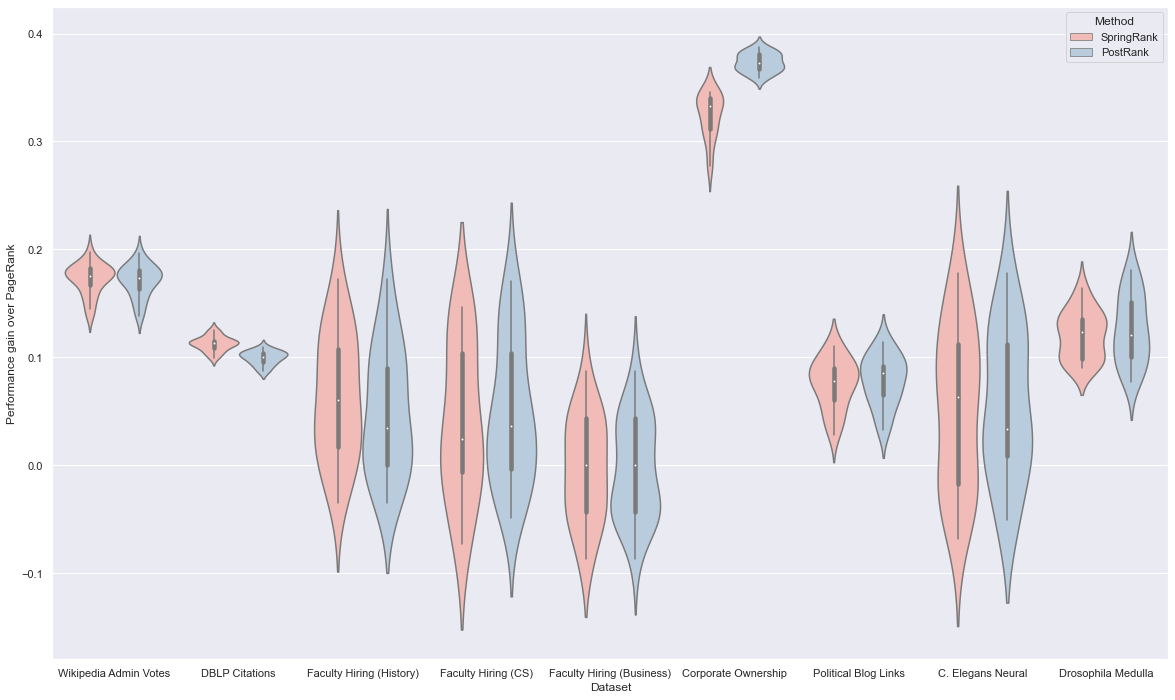

In [20]:
sns.set(rc={'figure.figsize':(20,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over PageRank", hue="Method", data=dataframe_perf_gains, palette="Pastel1")
plt.show()

<ipython-input-27-c7bc7d5cd6c5>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns_plot.set_yticklabels([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5], size = 15)


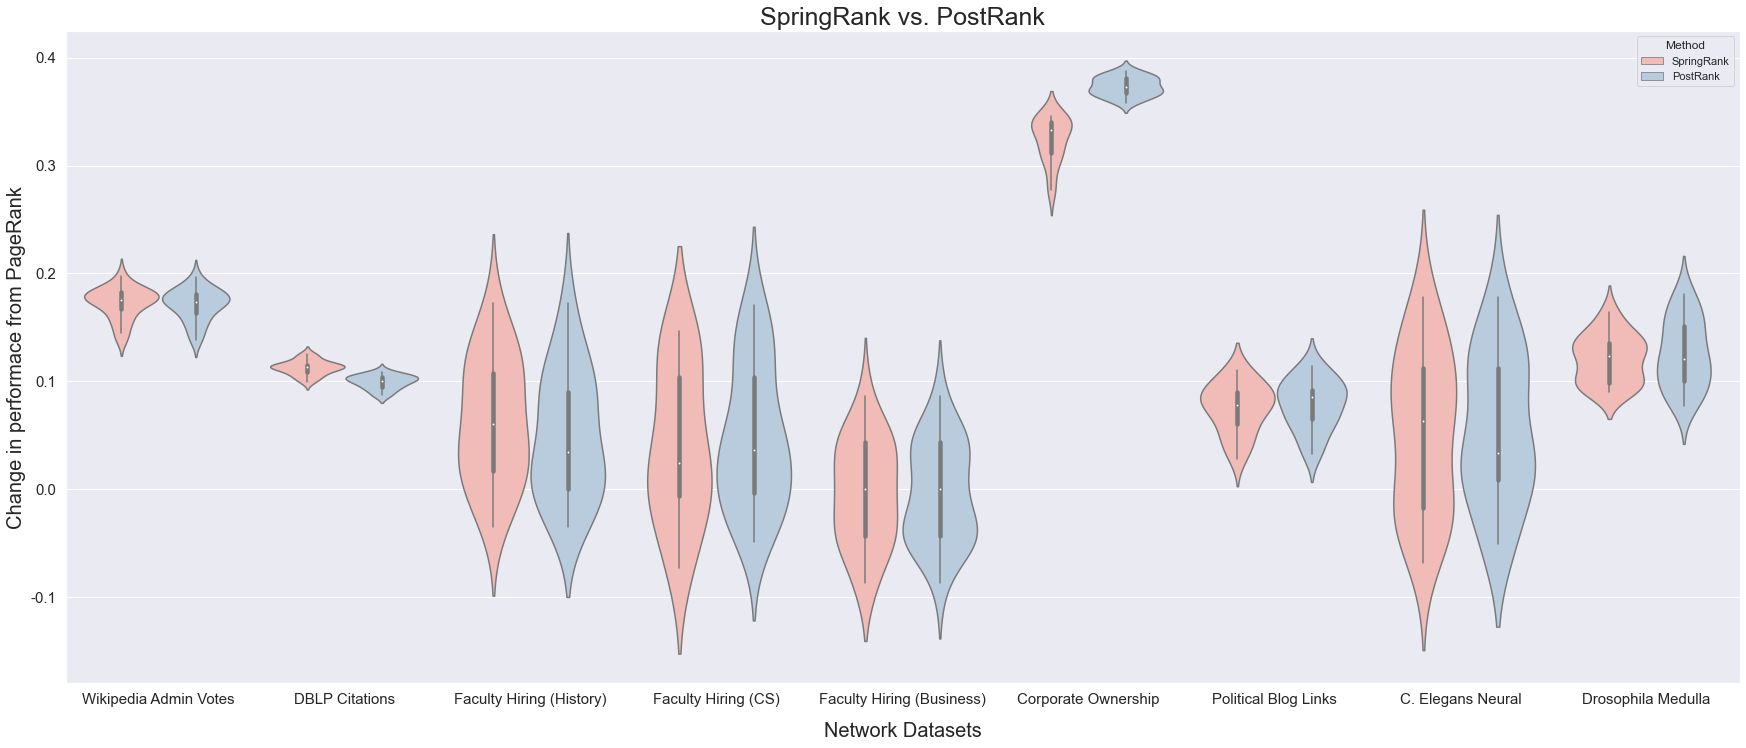

In [27]:
sns.set(rc={'figure.figsize':(30,12)})
sns_plot = sns.violinplot(x="Dataset", y="Performance gain over PageRank", hue="Method", data=dataframe_perf_gains, palette="Pastel1")

sns_plot.axes.set_title("SpringRank vs. PostRank",fontsize=25)
sns_plot.set_xlabel("Network Datasets",fontsize=20)
sns_plot.set_ylabel("Change in performace from PageRank",fontsize=20)
y_ticks = sns_plot.get_yticks()
sns_plot.set_yticklabels([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5], size = 15)
sns_plot.set_xticklabels(datasets, size = 15)
sns_plot.xaxis.labelpad = 15

sns_plot.figure.savefig("SpringRank_vs_PostRank.png")
plt.show()

In [14]:
sns_plot.get_yticks()

array([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5])